In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Read Data 

In [3]:

df=pd.read_csv("train.csv")


In [4]:
df.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [5]:
# check no of classes from target 
df.topic.unique()

array(['Shipment and delivery', 'Not Effective', 'Customer Service',
       'Allergic', 'Texture', 'Quality/Contaminated', 'Color and texture',
       'Bad Taste/Flavor', 'Too big to swallow', 'Smells Bad',
       'Too Sweet', 'Ingredients', 'Expiry', 'Packaging',
       'Wrong Product received', 'Pricing', 'False Advertisement',
       'Inferior to competitors', "Didn't Like", 'Customer Issues',
       'Hard to Chew'], dtype=object)

#### Seems there are 21 classes we need to predict





# Lets clean text data!! 

### Steps:
####    Remove Puctuations
####    Remove stopwords
####    Stemming data 

In [6]:
import string,re

from nltk.corpus import stopwords

sw=stopwords.words('english')


def cleantext(s):
    
    s=s.translate(s.maketrans("","",string.punctuation))
    s=[w for w in s.split(' ') if w not in sw]
    s=' '.join(s)
    return s
    

In [7]:
df['Review Text'][0]

"Did nothing for me, didn't help lost even with working out and eating healthy. Didn't curb appetite or anything."

In [8]:
cleantext(df['Review Text'][0])

'Did nothing didnt help lost even working eating healthy Didnt curb appetite anything'

In [9]:
df.rename(columns={'Review Text':"Review_Text","Review Title":"Review_Title"},inplace=True)

# In the world of social media , emoijis are used often and we can use that as a features 

In [10]:
df['Star']=df.Review_Text.apply(lambda x:1 if "*" in x else 0)

df['smiley']=df.Review_Text.apply(lambda x:1 if ":)" in x else 0)
df['sad']=df.Review_Text.apply(lambda x:1 if ":(" in x else 0)
df['exp']=df.Review_Text.apply(lambda x:1 if "!" in x else 0)
df['hash']=df.Review_Text.apply(lambda x:1 if "#" in x else 0)
df['comma']=df.Review_Text.apply(lambda x:1 if "," in x else 0)
df['dollar']=df.Review_Text.apply(lambda x:1 if "$" in x else 0)

df['length']=df.Review_Text.apply(lambda x:len(x))

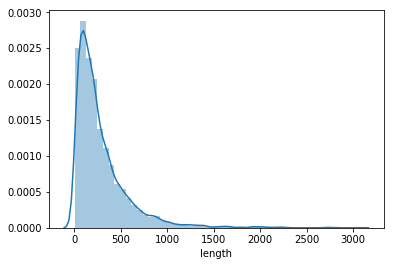

In [11]:


sns.distplot(df.length)

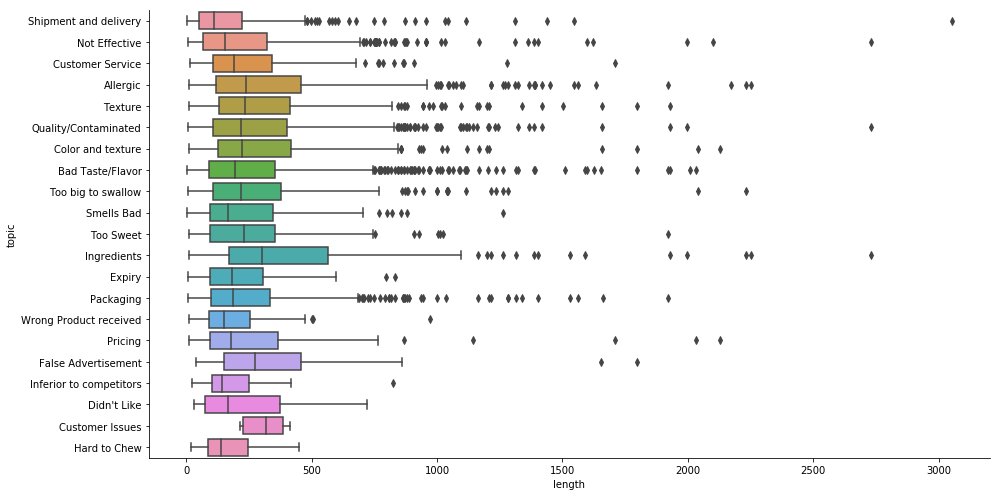

In [12]:
# figure shows distribustion of length across all classes 
sns.catplot(x='length',y='topic',kind='box',data=df,height=7,aspect=2)


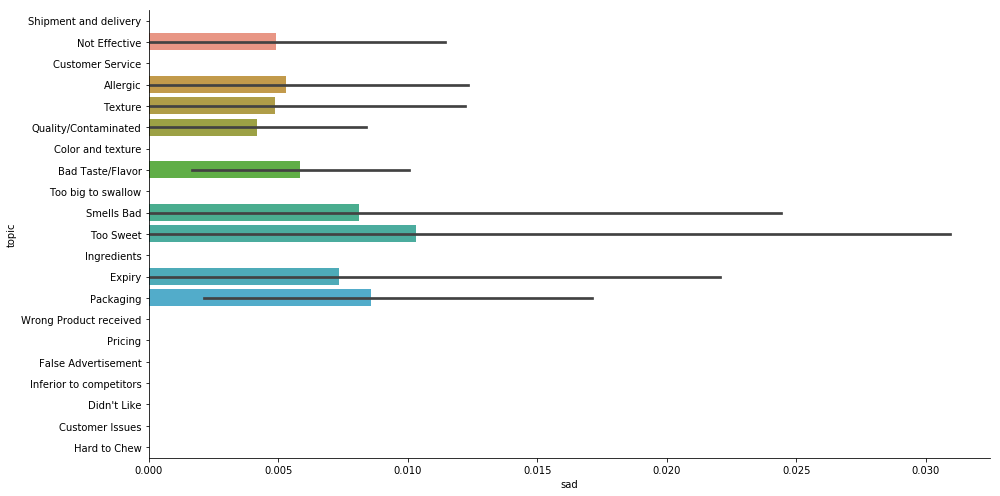

In [13]:
sns.catplot(x='sad',y='topic',kind='bar',data=df,height=7,aspect=2)

In [14]:
df.smiley.value_counts()

0    5951
1       8
Name: smiley, dtype: int64

In [15]:
df.sad.value_counts()

0    5934
1      25
Name: sad, dtype: int64

In [16]:
df.dollar.value_counts()

0    5801
1     158
Name: dollar, dtype: int64

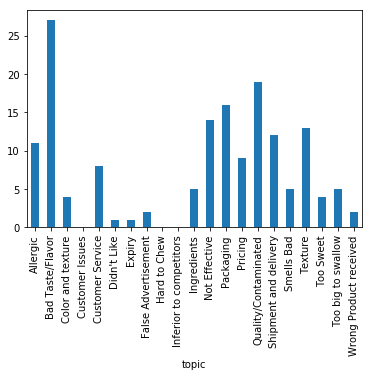

In [17]:
df.groupby(['topic'])['dollar'].sum().plot.bar()

In [18]:
df.head()

,Review_Text,Review_Title,topic,Star,smiley,sad,exp,hash,comma,dollar,length
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery,0,0,0,0,0,1,0,112
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective,0,0,0,0,0,1,0,112
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service,0,0,0,0,0,0,0,243
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic,0,0,1,0,0,0,0,42
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture,0,0,0,0,0,1,0,318


In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [20]:
vect=CountVectorizer(max_features=1000)

In [21]:
vect.fit(df.Review_Title)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
x1=vect.transform(df.Review_Title)

In [23]:
x1.shape

(5959, 1000)

In [24]:
type(vect.vocabulary_)

dict

In [25]:
import operator

In [26]:
d1=sorted(vect.vocabulary_.items(),key=operator.itemgetter(0),reverse=True)


In [27]:
d1

[('zyrtec', 999),
 ('zinc', 998),
 ('zesty', 997),
 ('yucky', 996),
 ('yuck', 995),
 ('your', 994),
 ('you', 993),
 ('yikes', 992),
 ('yet', 991),
 ('yes', 990),
 ('years', 989),
 ('wrong', 988),
 ('wow', 987),
 ('wouldn', 986),
 ('would', 985),
 ('worth', 984),
 ('worst', 983),
 ('worse', 982),
 ('works', 981),
 ('workout', 980),
 ('working', 979),
 ('work', 978),
 ('wonderful', 977),
 ('won', 976),
 ('women', 975),
 ('without', 974),
 ('with', 973),
 ('wish', 972),
 ('wipes', 971),
 ('will', 970),
 ('why', 969),
 ('whole', 968),
 ('who', 967),
 ('while', 966),
 ('which', 965),
 ('whey', 964),
 ('where', 963),
 ('when', 962),
 ('what', 961),
 ('wet', 960),
 ('were', 959),
 ('went', 958),
 ('well', 957),
 ('weird', 956),
 ('weight', 955),
 ('weeks', 954),
 ('week', 953),
 ('weak', 952),
 ('we', 951),
 ('way', 950),
 ('watermelon', 949),
 ('water', 948),
 ('watch', 947),
 ('waste', 946),
 ('wash', 945),
 ('was', 944),
 ('warning', 943),
 ('warm', 942),
 ('wanted', 941),
 ('want', 940),


In [28]:


tfdf=TfidfVectorizer(ngram_range=(1,3),max_df=0.7,min_df=5,max_features=10000)

In [29]:
tfdf.fit(df.Review_Text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=10000,
                min_df=5, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [30]:
x2=tfdf.transform(df.Review_Text)

In [31]:
x2.shape

(5959, 10000)

In [33]:
d1=sorted(tfdf.vocabulary_.items(),key=operator.itemgetter(0),reverse=True)

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
snl=SentimentIntensityAnalyzer()

In [37]:
snl.polarity_scores("Gave me an allergic reaction on my face")

{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

In [38]:
snl.polarity_scores("Gave me an allergic reaction on my face :(")

{'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'compound': -0.6249}

In [39]:
snl.polarity_scores(df.Review_Text[5])

{'neg': 0.098, 'neu': 0.791, 'pos': 0.111, 'compound': -0.0243}

In [40]:
df.Review_Text[5]

"These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong."

In [41]:
snl.polarity_scores(df.Review_Text[5])['compound']

-0.0243

In [42]:
df['Compound_polarity']=df.Review_Text.apply(lambda x:snl.polarity_scores(x)['compound'])

Text(0.5, 1.0, ' Polarity of Each Topic')

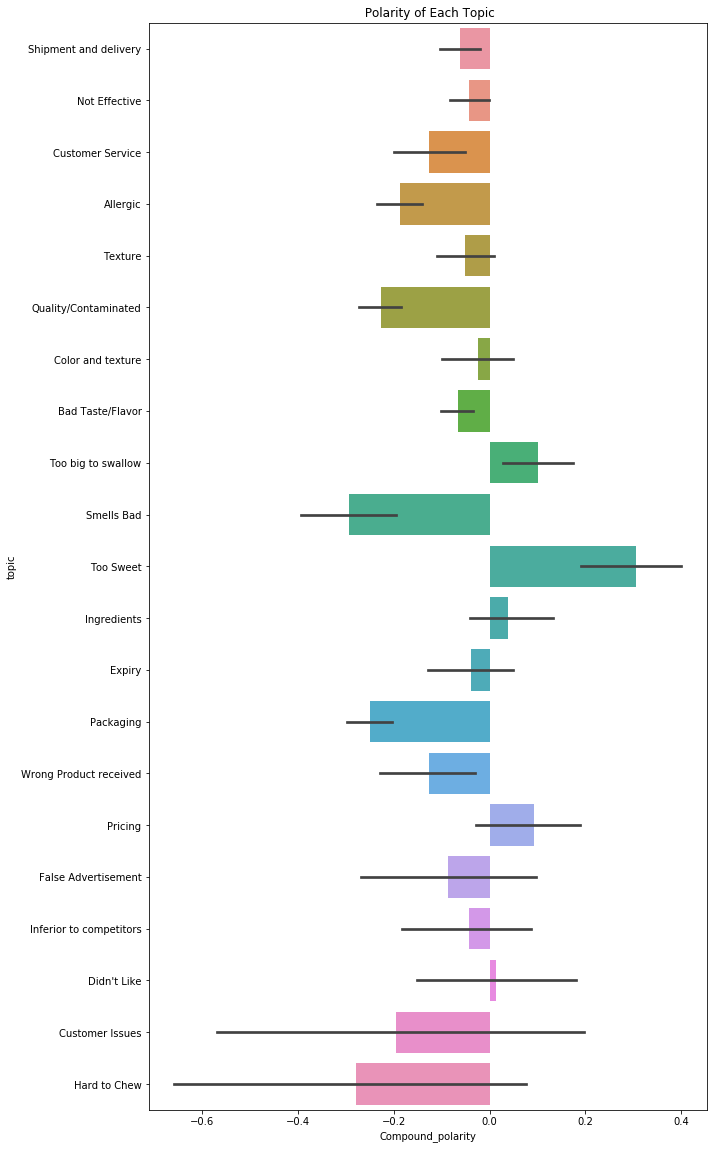

In [43]:
plt.figure(figsize=(10,20))
sns.barplot(x='Compound_polarity',y='topic',data=df)
plt.title(" Polarity of Each Topic")

In [44]:
df.head()

,Review_Text,Review_Title,topic,Star,smiley,sad,exp,hash,comma,dollar,length,Compound_polarity
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery,0,0,0,0,0,1,0,112,0.3408
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective,0,0,0,0,0,1,0,112,0.3408
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service,0,0,0,0,0,0,0,243,0.0000
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic,0,0,1,0,0,0,0,42,-0.6249
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture,0,0,0,0,0,1,0,318,-0.0243


In [52]:
#y=pd.get_dummies(df['topic']).values

In [53]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [54]:
lb=LabelEncoder()

In [55]:
lb.fit(df.topic)
y=lb.transform(df.topic)


In [56]:
onh=OneHotEncoder()

In [57]:
from keras import utils as np_utils

Using TensorFlow backend.


In [58]:
y = np_utils.to_categorical(y, num_classes= 21)

In [59]:
y.shape

(5959, 21)

In [63]:
df.drop(['Review_Text','Review_Title','topic'],axis=1,inplace=True)

In [64]:
df.head()

,Star,smiley,sad,exp,hash,comma,dollar,length,Compound_polarity
0,0,0,0,0,0,1,0,112,0.3408
1,0,0,0,0,0,1,0,112,0.3408
2,0,0,0,0,0,0,0,243,0.0000
3,0,0,1,0,0,0,0,42,-0.6249
4,0,0,0,0,0,1,0,318,-0.0243


In [65]:
x3=df.values

In [66]:
X=np.hstack([x1.toarray(),x2.toarray(),x3])

In [67]:
X.shape

(5959, 11009)

# # Building Deep Neural Network model

In [68]:


from keras.layers import Activation,Conv2D,Flatten,Dropout,Dense

In [69]:
from keras.models import Sequential

In [70]:
model =Sequential()

In [71]:
model.add(Dense(512,input_dim=X.shape[1],activation="relu"))

Instructions for updating:
Colocations handled automatically by placer.


In [72]:
model.add(Dense(256,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(21,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [73]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
import tensorflow as tf

In [75]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16981165980493495130
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3148270796
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7012844379404810436
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
y.shape

(5959, 21)

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [79]:

with tf.device("/GPU:0"):
    history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=20)

Instructions for updating:
Use tf.cast instead.
Train on 4767 samples, validate on 1192 samples
Epoch 1/100
4767/4767 [==============================] - 6s 1ms/step - loss: 2.8671 - acc: 0.1569 - val_loss: 2.6386 - val_acc: 0.2215
Epoch 2/100
4767/4767 [==============================] - 4s 848us/step - loss: 2.5421 - acc: 0.2060 - val_loss: 2.3888 - val_acc: 0.2844
Epoch 3/100
4767/4767 [==============================] - 4s 879us/step - loss: 2.2495 - acc: 0.2855 - val_loss: 2.2138 - val_acc: 0.3205
Epoch 4/100
4767/4767 [==============================] - 4s 860us/step - loss: 2.0930 - acc: 0.3470 - val_loss: 2.0866 - val_acc: 0.3733
Epoch 5/100
4767/4767 [==============================] - 4s 864us/step - loss: 1.9060 - acc: 0.4080 - val_loss: 2.0539 - val_acc: 0.3842
Epoch 6/100
4767/4767 [==============================] - 4s 849us/step - loss: 1.7327 - acc: 0.4521 - val_loss: 2.0638 - val_acc: 0.4052
Epoch 7/100
4767/4767 [==============================] - 4s 847us/step - loss: 1.634

In [80]:
loss,acc=model.evaluate(X_test,y_test)

1192/1192 [==============================] - 0s 181us/step


In [81]:
print("loss",loss,'acc',acc)

loss 6.5477179392872245 acc 0.3733221476510067


In [82]:
loss,acc=model.evaluate(X_train,y_train)
print("loss",loss,'acc',acc)

4767/4767 [==============================] - 1s 178us/step
loss 0.5164166128632905 acc 0.7426054122464473


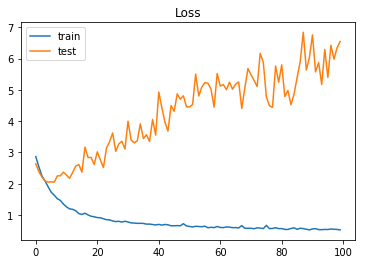

In [83]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

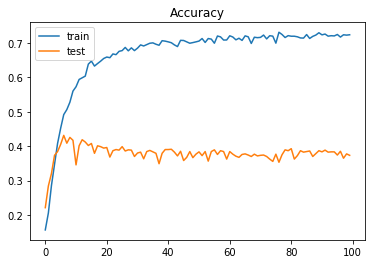

In [84]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [107]:

dt=pd.read_csv("test.csv")
dt.rename(columns={'Review Text':"Review_Text","Review Title":"Review_Title"},inplace=True)
dt['Star']=dt.Review_Text.apply(lambda x:1 if "*" in x else 0)
dt['smiley']=dt.Review_Text.apply(lambda x:1 if ":)" in x else 0)
dt['sad']=dt.Review_Text.apply(lambda x:1 if ":(" in x else 0)
dt['exp']=dt.Review_Text.apply(lambda x:1 if "!" in x else 0)
dt['hash']=dt.Review_Text.apply(lambda x:1 if "#" in x else 0)
dt['comma']=dt.Review_Text.apply(lambda x:1 if "," in x else 0)
dt['dollar']=dt.Review_Text.apply(lambda x:1 if "$" in x else 0)

dt['length']=dt.Review_Text.apply(lambda x:len(x))

dt['Compound_polarity']=dt.Review_Text.apply(lambda x:snl.polarity_scores(x)['compound'])


In [108]:
xt1=vect.transform(dt.Review_Title)
xt2=tfdf.transform(dt.Review_Text)
r1=dt.Review_Text.values
r2=dt.Review_Title.values
dt.drop(['Review_Text','Review_Title'],axis=1,inplace=True)
xt3=dt.values

In [109]:
x3.shape

(5959, 9)

In [110]:
xt=X=np.hstack([xt1.toarray(),xt2.toarray(),xt3])

In [111]:
y_pred=model.predict_classes(xt)

In [112]:
y_pred

array([14, 14, 11, ...,  0, 14,  4], dtype=int64)

In [113]:
y_pred=lb.inverse_transform(y_pred)

In [114]:

tp=pd.DataFrame({'Review Text':r1,'Review Title':r2,'topic':y_pred})

In [116]:
tp.to_csv('Submission_1.csv',index=False)